In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('sat_gpa_v1.csv')
df

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63
...,...,...
995,1000,2.19
996,1080,1.50
997,1140,3.17
998,1200,1.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   fy_gpa   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


### Dividing data into training set and test set

In [22]:
X = df['sat_sum']
y = df['fy_gpa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scatter plot representing the relationship between GPA and SAT scores. 
### Linear regression model. 
### Statistical interpretation of regression model results


Testing Data Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 fy_gpa   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           2.08e-41
Time:                        14:28:37   Log-Likelihood:                -809.17
No. Observations:                 800   AIC:                             1622.
Df Residuals:                     798   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0

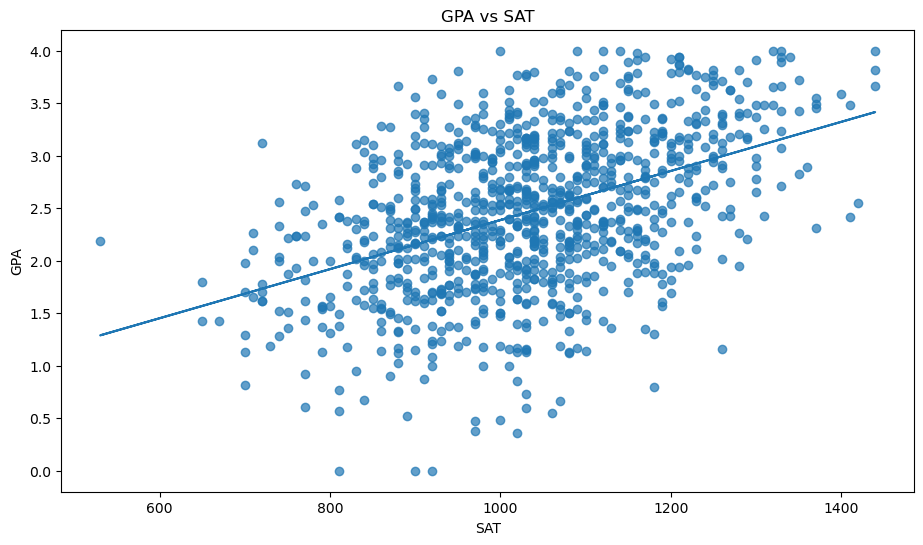

In [21]:
plt.figure(figsize=(11, 6))
plt.scatter(X, y, alpha=0.7)
plt.title('GPA vs SAT')
plt.xlabel('SAT')
plt.ylabel('GPA')

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()



# Now, y_pred contains the predicted values for the testing data

plt.plot(X_train['sat_sum'], model.predict(X_train))

print("\nTesting Data Regression Summary:")
print(model.summary())

# Show the plots
plt.show()


### Evaluating the model

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Define a threshold for classification
threshold = 0.5


y_pred = model.predict(X_test)

# Transform regression predictions into binary classification labels
predicted_labels = (y_pred > threshold).astype(int)

# Define true binary labels based on the threshold
true_labels = (y_test > threshold).astype(int)

# Calculate precision, recall, and accuracy
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Precision: 0.995
Recall: 1.0
Accuracy: 0.995
